In [1]:
import os
import glob
from setdir import *
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from SIO_wrap import drifter_qc as dqc
%load_ext autoreload
%autoreload 2
%reload_ext autoreload



#------------
# Names of variables
latname = 'GPS_Latitude_deg'
lonname = 'GPS_Longitude_deg'
uvelname = 'uvel'
vvelname = 'vvel'



In [2]:
PID1=300234068346740
pidstr = str(PID1)

In [3]:
fname = 'pid'+pidstr+'.nc'
raw_files = glob.glob(cat_raw_path(fname))
latest_raw = max(raw_files, key=os.path.getctime)
ds_raw = xr.open_dataset(latest_raw)

int_files = glob.glob(cat_interim_path(fname))
latest_int = max(int_files, key=os.path.getctime)
ds_int = xr.open_dataset(latest_int)


(63.0, 66.0)

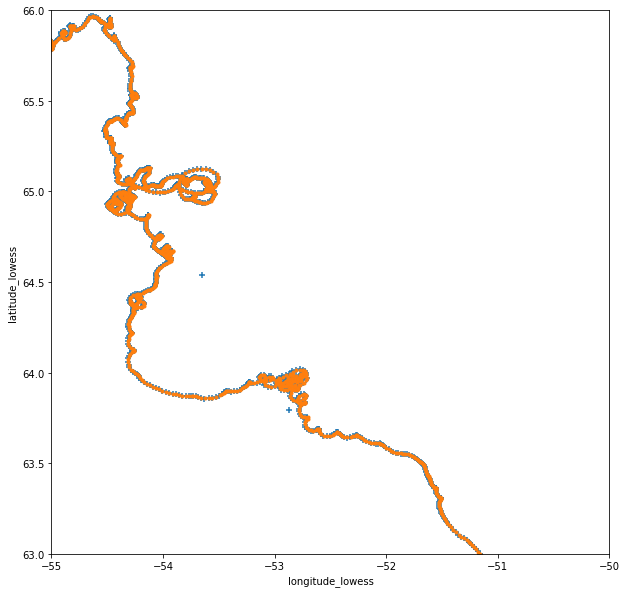

In [4]:

xlim = [-65, -40]
ylim = [58, 68]

xlim = [-55, -50]
ylim = [63, 66]


fig = plt.figure(figsize=(10,10))
ds_raw.plot.scatter(x=lonname, y=latname, marker='+')
ds_int.plot.scatter(x=lonname, y=latname, marker='.')

ax1 = plt.gca()
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

In [5]:
fields_to_remove = ['Battery_volts', 'GPS_HDOP', 'GPS_FixDelay',
                    'GPS_TTFF', 'GPS_NumSat', 'SBD_Transmit_Delay',
                    'SBD_Retries', 'SST_degC', 'SLP_mB']
good_flagval = 1
bad_gps_flagval = 4 
bad_vel_flagval = 3
ref_time = datetime.datetime(2000, 1, 1)
na_lonlim = [-80, 30]
na_latlim = [40, 80]
vel_threshold = 2 # in m/s


_, ds_qc, _ = dqc.drifter_flagbad(ds_raw, 
                                  fields_to_remove, 
                                  lonname, latname, 
                                  good_flagval, ref_time,
                                  bad_gps_flagval, 
                                  na_latlim, na_lonlim,
                                  uvelname, vvelname, 
                                  vel_threshold,
                                  bad_vel_flagval)

<class 'xarray.core.dataset.Dataset'>
Flagged 362 for GPS dropouts, 9 for region, 0 for velo


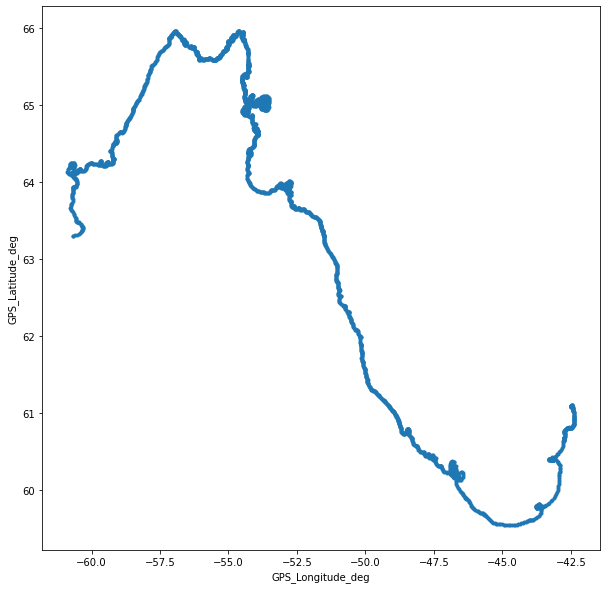

In [12]:
fig = plt.figure(figsize=(10,10))
#ds_raw.plot.scatter(x=lonname, y=latname, marker='+')
ds_qc.plot.scatter(x=lonname, y=latname, marker='.')
ax1 = plt.gca()
#ax1.set_xlim(xlim)
#ax1.set_ylim(ylim)



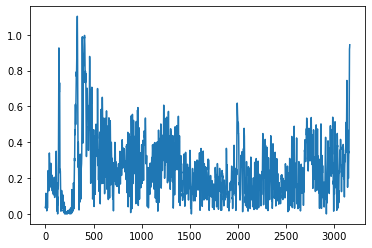

In [7]:
velmag = np.sqrt(np.square(ds_qc.uvel) + np.square(ds_qc.vvel))
plt.plot(velmag)




# Flag velocity
There is a problem here where the locations before and after the bad location are removed.

Something to do with how velocity is calculated - maybe need a simpler calculation than jlab's latlon2uv.

(-57.5, -52.5)

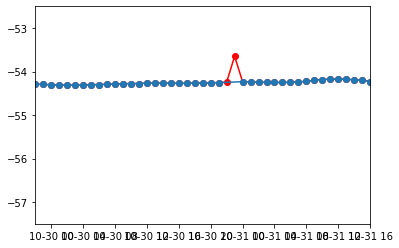

In [8]:
plt.plot(ds_raw['time'],ds_raw[lonname],color='r',marker='o')

plt.plot(ds_qc['time'],ds_qc[lonname],marker='o')

t1 = ds_qc['time'].values[1400]
t2 = ds_qc['time'].values[1440]
#plt.xlim([1400,1440])
plt.xlim([t1,t2])

plt.ylim([-57.5, -52.5])

(-1.0, 1.0)

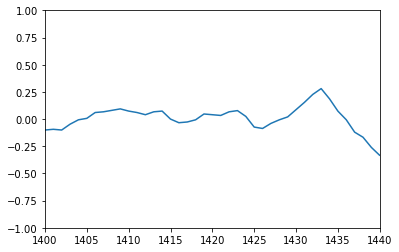

In [9]:
plt.plot(ds_qc[uvelname])
plt.xlim([1400,1440])
plt.ylim([-1, 1])


In [10]:
print(ds_raw.attrs["Platform_ID"])
print(ds_qc.attrs["Platform_ID"])

300234068346740
300234068346740
